In [1]:
import os
import os.path as osp

from src.circle_detection.hough_circle_detection import *
from src.utility import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_ds = "./datasets/"
path_ds_test = osp.join(path_ds, "droplets", "test", "original")

In [3]:
path_images = [osp.join(path_ds_test, x) for x in os.listdir(path_ds_test)]

# Baseline Classifier

In [4]:
# idx = 26
idx = 20
image = cv2.imread(path_images[idx])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

list_circles = hough_circle_detection(gray)

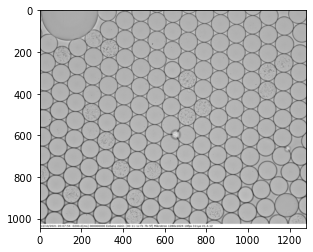

In [5]:
plt.imshow(image, cmap="gray")

## Histogram of sample droplets

### Empty Droplet

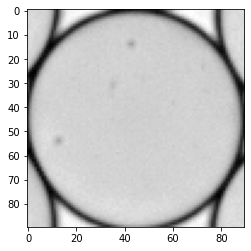

In [6]:
idx_circle = 3
circle = list_circles[0, idx_circle]

x_1 = int(circle[0]) - int(1 * circle[2])
y_1 = int(circle[1]) - int(1 * circle[2])
x_2 = int(circle[0]) + int(1 * circle[2])
y_2 = int(circle[1]) + int(1 * circle[2])

droplet_image = gray[y_1:y_2, x_1:x_2]
plt.imshow(droplet_image, cmap="gray")

In [7]:
image_mask = create_circular_mask(droplet_image.shape).astype("uint8") * 255

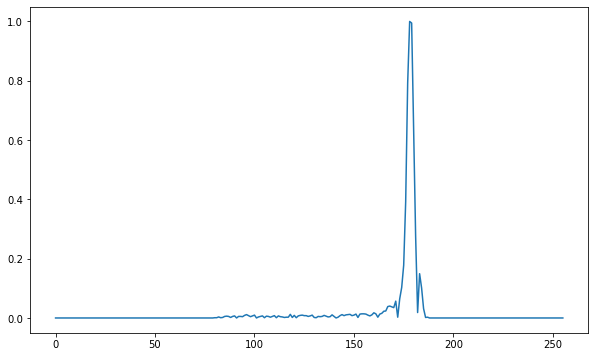

In [8]:
histogram = cv2.calcHist([droplet_image], channels=[0], mask=image_mask, histSize=[256], ranges=[0, 256])
hist_normed = cv2.normalize(histogram, histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(10, 6))
plt.plot(hist_normed)
plt.show()

In [9]:
hist_normed.sum()

5.553712

### Bacteria Droplet

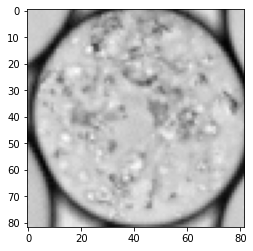

In [44]:
idx_circle = 100
circle = list_circles[0, idx_circle]

x_1 = int(circle[0]) - int(1 * circle[2])
y_1 = int(circle[1]) - int(1 * circle[2])
x_2 = int(circle[0]) + int(1 * circle[2])
y_2 = int(circle[1]) + int(1 * circle[2])

droplet_image = gray[y_1:y_2, x_1:x_2]
plt.imshow(droplet_image, cmap="gray")

In [45]:
image_mask = create_circular_mask(droplet_image.shape).astype("uint8") * 255

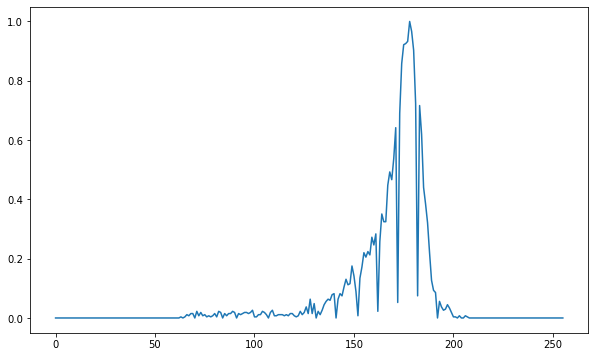

In [46]:
histogram = cv2.calcHist([droplet_image], channels=[0], mask=image_mask, histSize=[256], ranges=[0, 256])
hist_normed = cv2.normalize(histogram, histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(10, 6))
plt.plot(hist_normed)
plt.show()

In [13]:
hist_normed.sum()

5.0373135

## The classifier

In [22]:
# Classifier
thres = 13
list_cls = []
for circle in list_circles[0]:
    _, hist_sum = calculate_hist_sum(gray, circle)
    list_cls.append(1 if hist_sum > thres else 0)

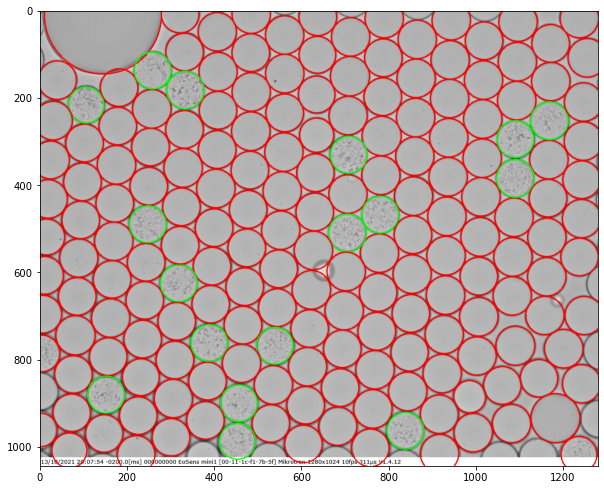

In [23]:
image_copy = image.copy()
for circle, cls in zip(list_circles[0], list_cls):
    circle = circle.astype(int)
    cv2.circle(image_copy, (circle[0], circle[1]), circle[2], (255 * (cls == 0), 255 * (cls == 1), 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_copy)
    